Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [1]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [2]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

print(X.shape, y.shape)

(4, 1) (4,)


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [3]:
from sklearn.preprocessing import PolynomialFeatures
# Vaš kôd ovdje

poly = PolynomialFeatures(1)
X_ = poly.fit_transform(X)

### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [4]:
from numpy import linalg
# Vaš kôd ovdje
weights = linalg.inv(X_.T.dot(X_)).dot(X_.T).dot(y)
print(f'Weights calculated without linalg.pinv: {weights} \nWeights calculated with linalg.pinv: {linalg.pinv(X_).dot(y)}')




Weights calculated without linalg.pinv: [2.2        0.45714286] 
Weights calculated with linalg.pinv: [2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

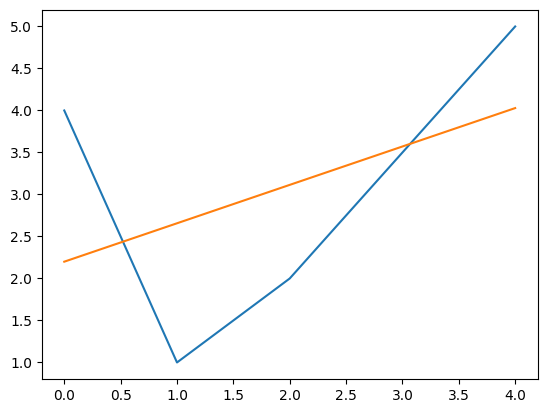

Calculated train error: 4.085714285714286 
Calculated train error using skleant.metrics function mean_square_error: 2.042857142857143


In [5]:
from sklearn.metrics import mean_squared_error

plt.plot(X,y)
plt.plot(X,weights.dot(X_.T))
plt.show()

print(f'Calculated train error: {1/2*np.power((y-weights.dot(X_.T)),2).sum()} \nCalculated train error using skleant.metrics function mean_square_error: {mean_squared_error(weights.dot(X_.T),y)}')
# Vaš kôd ovdje

### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [6]:
# Vaš kôd ovdje

weights_using_inverse = linalg.inv(X_).dot(y)

#Error, matrica dizajna nije kvadratna te nema inverz

LinAlgError: Last 2 dimensions of the array must be square

### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(fit_intercept=True).fit(X, y)

print(f'lin_reg.coef_ iliti w0: {lin_reg.coef_}, lin_reg.intercept_ iliti w1: {lin_reg.intercept_}')

y_ = lin_reg.predict(X)

print(f'Train error: {mean_squared_error(y_,y)}')
# Vaš kôd ovdje

lin_reg.coef_ iliti w0: [0.45714286], lin_reg.intercept_ iliti w1: 2.2
Train error: 2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [8]:
from numpy.random import normal
def make_labels(X, f, noise=0):
	return np.array([f(x) + normal(scale=noise) for x in X])

In [9]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [10]:
# Vaš kôd ovdje
def fun(x: int) -> int:
	return 5+x-2*x*x-5*x*x*x

X_gen = make_instances(-5,5,50)
y_gen = make_labels(X_gen, fun, 200)

Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

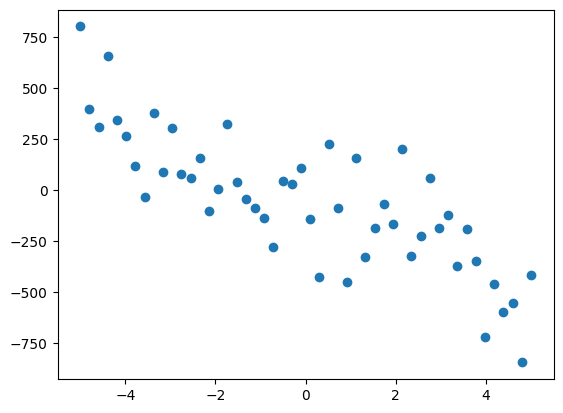

In [11]:
# Vaš kôd ovdje
plt.scatter(X_gen,y_gen)
plt.show()

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

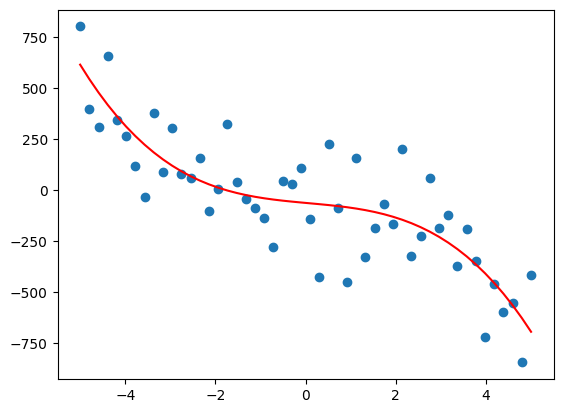

Train error: 30678.21179512577


In [12]:
# Vaš kôd ovdje

poly = PolynomialFeatures(3)

X_gen_ = poly.fit_transform(X_gen)

weights_gen = linalg.pinv(X_gen_).dot(y_gen)

plt.scatter(X_gen,y_gen)
plt.plot(X_gen, weights_gen.T.dot(X_gen_.T).T, color="red")
plt.show()

print(f'Train error: {mean_squared_error(weights_gen.T.dot(X_gen_.T).T,y_gen)}')


### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

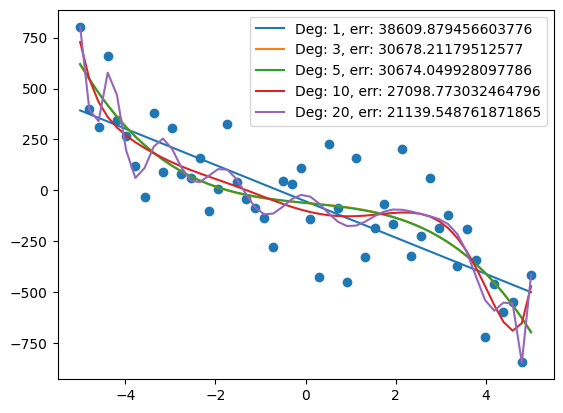

In [13]:
# Vaš kôd ovdje

d = [1, 3, 5, 10, 20]

plt.scatter(X_gen,y_gen)

for degree in d:
	poly = PolynomialFeatures(degree=degree)
	X_gen_ = poly.fit_transform(X_gen)
	weights_gen = linalg.pinv(X_gen_).dot(y_gen)

	plt.plot(X_gen, weights_gen.T.dot(X_gen_.T).T, label=f'Deg: {degree}, err: {mean_squared_error(weights_gen.T.dot(X_gen_.T).T,y_gen)}')
plt.legend(loc='best')
plt.show()

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

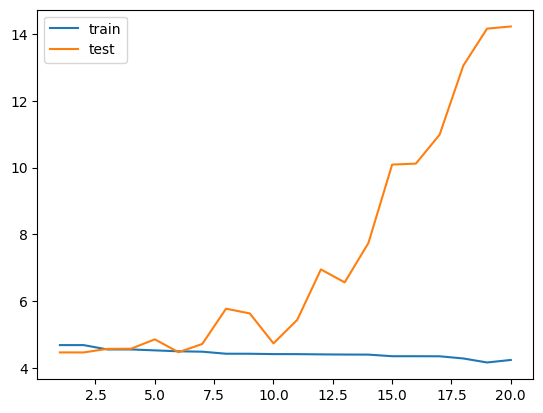

[48229.311969035196, 48209.075995591025, 35728.544501533535, 35726.74646646308, 33514.759941915625, 31424.80283837192, 30614.259840434384, 26597.43117713186, 26543.113191669137, 25925.77344041444, 25859.41546759948, 25422.163916721544, 25132.070786240125, 25005.16731803813, 22398.227673222787, 22397.64770018058, 22292.908432445794, 19179.055565729395, 14539.302799546333, 17294.734065604713]
[29102.486251017228, 29065.56890344247, 37198.42953214716, 37570.005592916634, 71717.21476741516, 29483.698551439018, 52169.15641698045, 593707.9528880459, 428958.2800183559, 54260.56409840522, 274748.4405109232, 8931557.229224527, 3648182.181839375, 55131993.869822025, 12347523986.975418, 13201494447.291807, 97166285497.07079, 11454111362142.43, 146153066259525.3, 169593837280137.22]


In [14]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje

X_gen_train,X_gen_test,y_gen_train,y_gen_test = train_test_split(X_gen,y_gen,test_size=0.5)

d = [x for x in range(1,21)]
train_error = []
test_error = []
for degree in d:
	poly = PolynomialFeatures(degree=degree)
	X_gen_train_ = poly.fit_transform(X_gen_train)
	X_gen_test_ = poly.fit_transform(X_gen_test)
	weights_gen = linalg.pinv(X_gen_train_).dot(y_gen_train)
	train_error.append(mean_squared_error(weights_gen.T.dot(X_gen_train_.T).T,y_gen_train))
	test_error.append(mean_squared_error(weights_gen.T.dot(X_gen_test_.T).T,y_gen_test))
plt.plot(d, np.log10(train_error), label="train")
plt.plot(d, np.log10(test_error), label='test')
plt.legend(loc='best')
plt.show()

print(train_error)
print(test_error)


### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

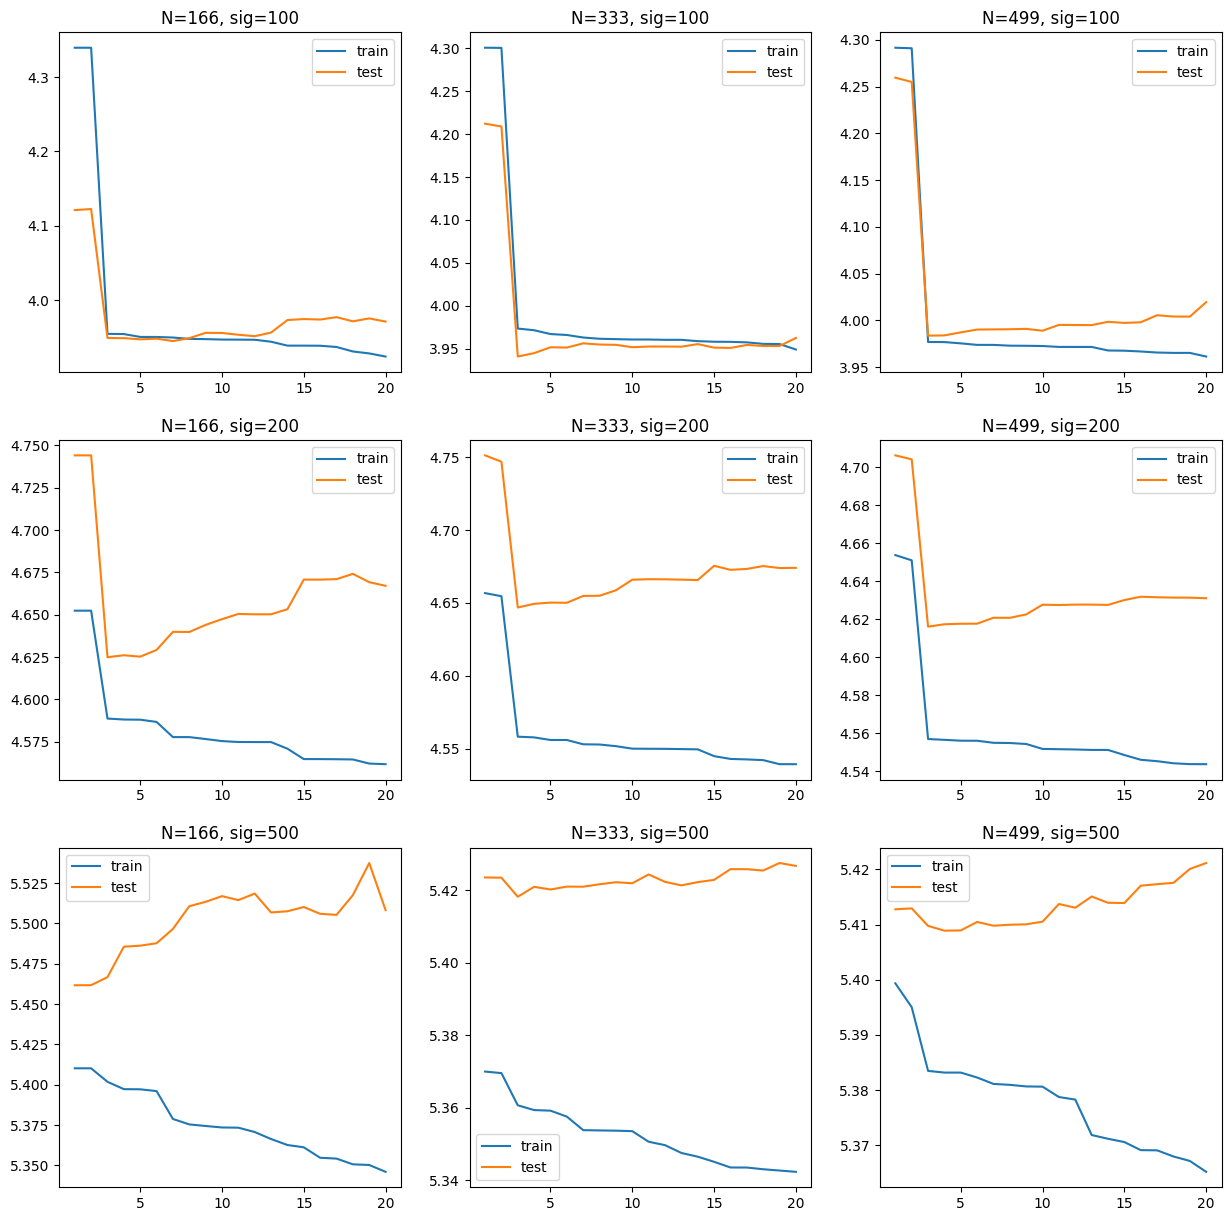

In [15]:
# Vaš kôd ovdje
N = [2/3, 1/3, 1]
sigmas = [100, 200, 500]
X_gen = make_instances(-5,5,1000)
f, axarr = plt.subplots(3, 3)
f.set_figheight(15)
f.set_figwidth(15)
#X_gen_train, X_gen_test = train_test_split(X_gen, train_size=0.5,shuffle=True)
for idx,sigma in enumerate(sigmas):

	y_gen = make_labels(X_gen, fun, sigma)
	X_gen_train, X_gen_test, y_gen_train, y_gen_test = train_test_split(X_gen, y_gen, test_size=0.5)
	for jdx,percent_of_samples in enumerate(N):
		X_gen_train_, tr_ , y_gen_train_, ts_= train_test_split(X_gen_train, y_gen_train, random_state=100, test_size=percent_of_samples)
		X_gen_test_, tr_ , y_gen_test_, ts_= train_test_split(X_gen_test, y_gen_test, random_state=100, test_size=percent_of_samples)
		train_error = []
		test_error = []
		for degree in d:
			poly = PolynomialFeatures(degree=degree)
			X_gen_train_2 = poly.fit_transform(X_gen_train_)
			X_gen_test_2 = poly.fit_transform(X_gen_test_)
			weights_gen = linalg.pinv(X_gen_train_2).dot(y_gen_train_)
			train_error.append(mean_squared_error(weights_gen.T.dot(X_gen_train_2.T).T,y_gen_train_))
			test_error.append(mean_squared_error(weights_gen.T.dot(X_gen_test_2.T).T,y_gen_test_))
		#print(train_error)
		#print(test_error)  
		axarr[idx, jdx].plot(d, np.log10(train_error), label="train")
		axarr[idx, jdx].plot(d, np.log10(test_error), label="test")
		axarr[idx, jdx].set_title(f'N={len(X_gen_train_)}, sig={sigma}')
		axarr[idx, jdx].legend(loc="best")
		

***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [16]:
# Vaš kôd ovdje

phis = [0, 1, 10]
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

poly = PolynomialFeatures(3)

X_ = poly.fit_transform(X)
reg = np.identity(n=X_.T.dot(X_).shape[0])
reg[0,0] = 0
for phi in phis:
	weights = linalg.inv(X_.T.dot(X_) + reg*phi).dot(X_.T).dot(y)
	print(f'phi={phi}, weights={weights}')

phi=0, weights=[ 4.         -5.91666667  3.375      -0.45833333]
phi=1, weights=[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
phi=10, weights=[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [17]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
for phi in phis:
	lin_regu = Ridge(alpha=phi, )
	lin_regu.fit(X_,y)
	print(f'phi={phi}, intercept={lin_regu.intercept_}, coef={lin_regu.coef_[1:]}')

phi=0, intercept=4.000000000000021, coef=[-5.91666667  3.375      -0.45833333]
phi=1, intercept=3.0569614512471652, coef=[-0.69079365 -0.2831746   0.1445805 ]
phi=10, intercept=2.4944418431229725, coef=[-0.15897295 -0.13423067  0.0815601 ]


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

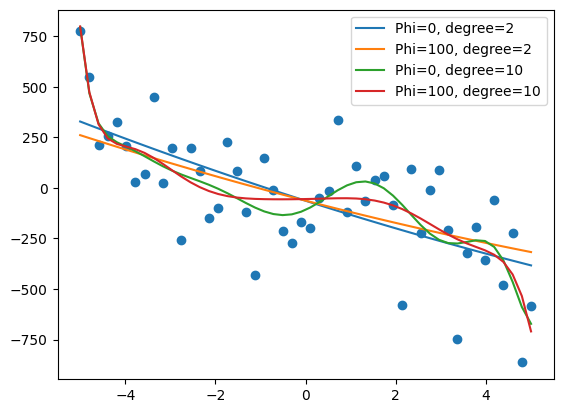

In [18]:
# Vaš kôd ovdje
X_gen = make_instances(-5,5,50)
y_gen = make_labels(X_gen, fun, 200)
phis = [0,100]
degrees = [2,10]
plt.scatter(X_gen,y_gen)
for degree in degrees:
	poly = PolynomialFeatures(degree=degree)
	X_gen_ = poly.fit_transform(X_gen)
	for phi in phis:
		lin_regu = Ridge(alpha=phi)
		lin_regu.fit(X_gen_,y_gen)
		plt.plot(X_gen, lin_regu.predict(X_gen_), label=f'Phi={phi}, degree={degree}')
plt.legend(loc='best')
plt.show()
	

### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


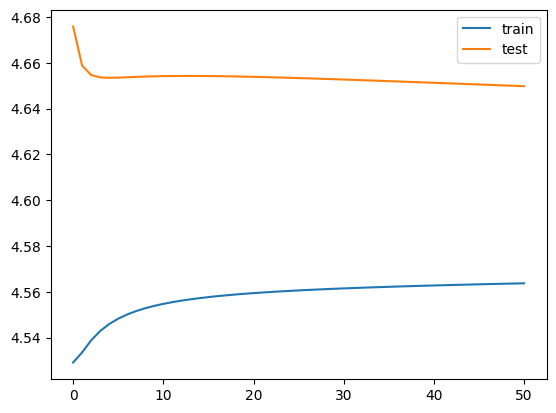

In [71]:
# Vaš kôd ovdje

phis = [x for x in range(0,51)]
train_error = []
test_error = []
poly = PolynomialFeatures(degree=10)
X_gen_ = poly.fit_transform(X_gen)
X_gen_train,X_gen_test,y_gen_train,y_gen_test = train_test_split(X_gen_,y_gen,test_size=0.5,random_state=55311)
for phi in phis:
	lin_regu = Ridge(alpha=phi)
	lin_regu.fit(X_gen_train,y_gen_train)
	train_error.append(mean_squared_error(y_gen_train, lin_regu.predict(X_gen_train)))
	test_error.append(mean_squared_error(y_gen_test, lin_regu.predict(X_gen_test)))
plt.plot(phis, np.log10(train_error), label="train")
plt.plot(phis, np.log10(test_error), label='test')
plt.legend(loc='best')
plt.show()

### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [51]:
def nonzeroes(coef, tol=1e-6):
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

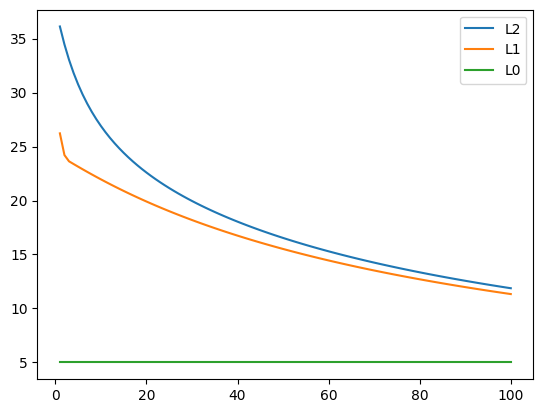

In [74]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje
phis = [x for x in range(1,101)]
L2_norm = []
L1_norm = []
L0_norm = []
poly = PolynomialFeatures(degree=5)
X_gen_ = poly.fit_transform(X_gen)
X_gen_train,X_gen_test,y_gen_train,y_gen_test = train_test_split(X_gen_,y_gen,test_size=0.5,random_state=51453141)
for phi in phis:
	lin_regu = Ridge(alpha=phi)
	lin_regu.fit(X_gen_train,y_gen_train)
	L2_norm.append(linalg.norm(lin_regu.coef_,ord=2))
	L1_norm.append(linalg.norm(lin_regu.coef_,ord=1))
	L0_norm.append(nonzeroes(coef=lin_regu.coef_[0][1:]))
plt.plot(phis, L2_norm, label="L2")
plt.plot(phis,L1_norm, label='L1')
plt.plot(phis,L0_norm, label='L0')
plt.legend(loc='best')
plt.show()

### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

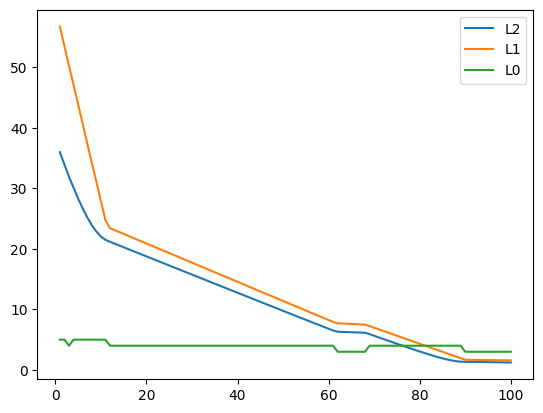

In [73]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje
phis = [x for x in range(1,101)]
L2_norm = []
L1_norm = []
L0_norm = []
poly = PolynomialFeatures(degree=5)
X_gen_ = poly.fit_transform(X_gen)
X_gen_train,X_gen_test,y_gen_train,y_gen_test = train_test_split(X_gen_,y_gen,test_size=0.5,random_state=51453141)
for phi in phis:
	lin_regu = Lasso(alpha=phi)
	lin_regu.fit(X_gen_train,y_gen_train)
	L2_norm.append(linalg.norm(lin_regu.coef_,ord=2))
	L1_norm.append(linalg.norm(lin_regu.coef_,ord=1))
	L0_norm.append(nonzeroes(coef=lin_regu.coef_[1:]))
plt.plot(phis, L2_norm, label="L2")
plt.plot(phis,L1_norm, label='L1')
plt.plot(phis,L0_norm, label='L0')
plt.legend(loc='best')
plt.show()

### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [64]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

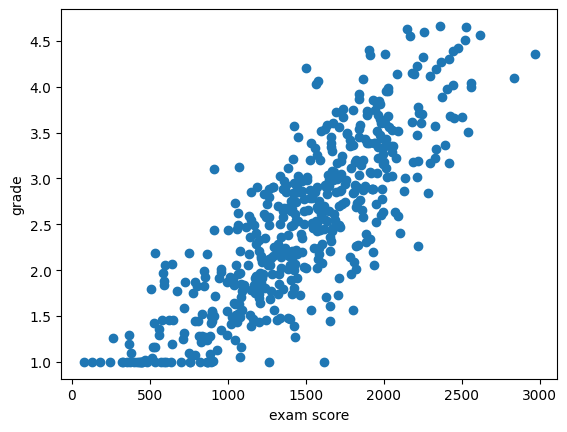

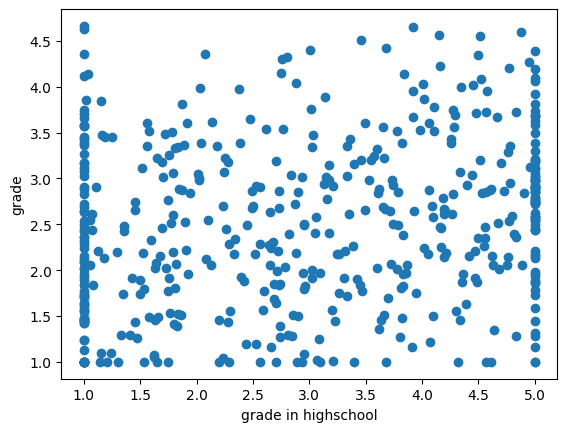

In [78]:
# Vaš kôd ovdje
plt.scatter(exam_score, grades_y)
plt.xlabel("exam score")
plt.ylabel("grade")
plt.show()

plt.scatter(grade_in_highschool, grades_y)
plt.xlabel("grade in highschool")
plt.ylabel("grade")
plt.show()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

In [85]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
grades_X_poly = poly.fit_transform(grades_X)
lin_regu = Ridge(alpha=0.01)
lin_regu.fit(grades_X_poly,grades_y)
print(f'intercept:{lin_regu.intercept_},weights:{lin_regu.coef_[1:]}')
	


intercept:0.1506117957577615,weights:[0.00141497 0.09477276]


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

In [104]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()
grades_X_fixed = scaler_x.fit_transform(grades_X)

grades_y_fixed = scaler_y.fit_transform(grades_y.reshape(-1, 1))

poly = PolynomialFeatures(1)
grades_X_poly = poly.fit_transform(grades_X_fixed)
lin_regu = Ridge(alpha=0.01)
lin_regu.fit(grades_X_poly,grades_y_fixed)
print(f'intercept:{lin_regu.intercept_},weights:{lin_regu.coef_[0][1:]}')
# Vaš kôd ovdje

intercept:[8.07023426e-17],weights:[0.81630375 0.15167761]


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [123]:
# Vaš kôd ovdje

grades_X_fixed_colinear = np.append(grades_X_fixed, (np.array([grades_X_fixed[:,1]])).T, axis=1)


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [124]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
grades_X_poly = poly.fit_transform(grades_X_fixed_colinear)
lin_regu = Ridge(alpha=0.01)
lin_regu.fit(grades_X_poly,grades_y_fixed)
print(f'intercept:{lin_regu.intercept_},weights:{lin_regu.coef_[0][1:]}')

intercept:[8.07031579e-17],weights:[0.81630364 0.07583957 0.07583957]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [138]:
# Vaš kôd ovdje
poly = PolynomialFeatures(1)
shape = (10, 3)
model_1000_weights = np.empty(shape)
model_001_weights = np.empty(shape)
grades_X_poly = poly.fit_transform(grades_X_fixed_colinear)
for _ in range(0,10):
	grades_X_train, a, grades_y_train, b = train_test_split(grades_X_poly,grades_y_fixed,train_size=0.5)
	for phi in [0.01, 1000]:
		lin_regu = Ridge(alpha=phi)
		lin_regu.fit(grades_X_train,grades_y_train)
		print(f'Model_phi={phi}, intercept:{lin_regu.intercept_},weights:{lin_regu.coef_[0][1:]}')
		if phi == 0.01:
			model_001_weights[_ , :] = lin_regu.coef_[0][1:]
		else:
			model_1000_weights[_ , :] = lin_regu.coef_[0][1:]

print(f'Standard deviations of weights in order for Phi=0.01 : {np.std(model_001_weights, axis=0)}')
print(f'Standard deviations of weights in order for Phi=1000 : {np.std(model_1000_weights, axis=0)}')

Model_phi=0.01, intercept:[0.01977404],weights:[0.82956698 0.08281659 0.08281659]
Model_phi=1000, intercept:[0.06564297],weights:[0.17596361 0.04009857 0.04009857]
Model_phi=0.01, intercept:[0.05011111],weights:[0.84431098 0.0980887  0.0980887 ]
Model_phi=1000, intercept:[0.04061332],weights:[0.18150686 0.04388467 0.04388467]
Model_phi=0.01, intercept:[0.02092111],weights:[0.8550841  0.06523653 0.06523653]
Model_phi=1000, intercept:[0.06026626],weights:[0.16729603 0.03929477 0.03929477]
Model_phi=0.01, intercept:[0.01296866],weights:[0.83167809 0.0743026  0.0743026 ]
Model_phi=1000, intercept:[-0.00658945],weights:[0.16849102 0.03693958 0.03693958]
Model_phi=0.01, intercept:[0.01321604],weights:[0.79514745 0.05970606 0.05970606]
Model_phi=1000, intercept:[-0.00195086],weights:[0.1547469  0.02357799 0.02357799]
Model_phi=0.01, intercept:[-0.07115454],weights:[0.8284546  0.08226646 0.08226646]
Model_phi=1000, intercept:[-0.08127631],weights:[0.17337263 0.03484963 0.03484963]
Model_phi=0.

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.